<a href="https://colab.research.google.com/github/Amirhosseinpoor/linearControl4031/blob/main/exercise2_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.7 MB/s eta 0:00:00
{'RiseTime': 0.1106890398236506, 'SettlingTime': 1.2618550539896167, 'SettlingMin': 1.2700233131308991, 'SettlingMax': 2.2798552104707728, 'Overshoot': 44.294633574099535, 'Undershoot': 0, 'Peak': 2.2798552104707728, 'PeakTime': 0.2877915035414915, 'SteadyStateValue': 1.58}


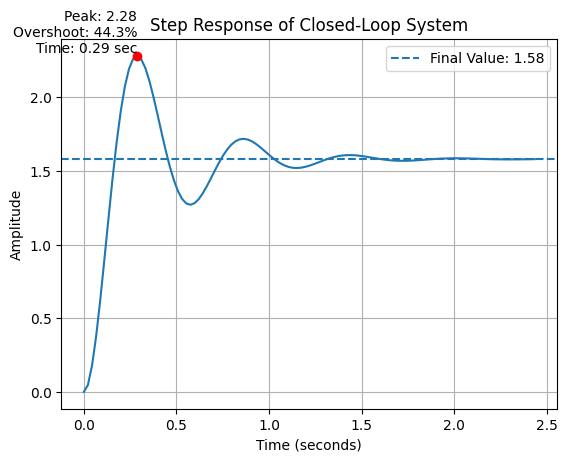

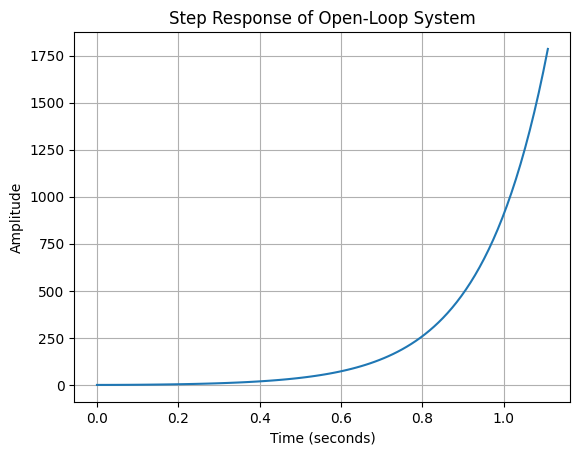

In [1]:
!pip install control matplotlib

from control import tf, step_response, step_info, feedback
import matplotlib.pyplot as plt

k = 1.58
wn = 11.306
xi = 0.2509

numerator = [k * wn**2]
denominator = [1, 2 * xi * wn, wn**2]
closed_loop_system = tf(numerator, denominator)

time, response = step_response(closed_loop_system)

plt.figure()
plt.plot(time, response)
plt.title('Step Response of Closed-Loop System')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)

info = step_info(closed_loop_system)
print(info)

peak_time = info['PeakTime']
peak_value = info['Peak']
final_value = response[-1]
overshoot_percent = info['Overshoot']

plt.plot(peak_time, peak_value, 'ro', markerfacecolor='r')
plt.text(peak_time, peak_value, f'Peak: {peak_value:.2f}\nOvershoot: {overshoot_percent:.1f}%\nTime: {peak_time:.2f} sec',
         verticalalignment='bottom', horizontalalignment='right')
plt.axhline(final_value, linestyle='--', label=f'Final Value: {final_value:.2f}')
plt.legend()

open_loop_system = feedback(closed_loop_system, -1)

time_ol, response_ol = step_response(open_loop_system)

plt.figure()
plt.plot(time_ol, response_ol)
plt.title('Step Response of Open-Loop System')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
